In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(x_train, Y_train), (x_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
print(f"x_train : {x_train.shape}, x_test : {x_test.shape}")

x_train : (60000, 28, 28), x_test : (10000, 28, 28)


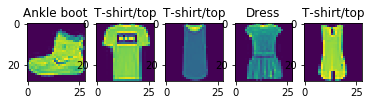

In [23]:
# data visualization
fig = plt.figure()
rows = 1
cols = 5
for i in range(5):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(x_train[i])
    ax.set_title(class_names[Y_train[i]])
plt.show()

## basic model build

In [66]:
import tensorflow.keras as keras
from tensorflow.keras import layers, models

In [69]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [70]:
optimizer = 'adam'
loss='sparse_categorical_crossentropy'

In [71]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [73]:
epoch = 10
batch_size = 128

In [74]:
history = model.fit(x_train, Y_train, 
                    validation_data=(x_test, Y_test), 
                    epochs=epoch, batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 7.7861 - accuracy: 0.7379 - val_loss: 1.7393 - val_accuracy: 0.6554
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.9514 - accuracy: 0.7241 - val_loss: 0.7854 - val_accuracy: 0.7364
Epoch 3/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.6431 - accuracy: 0.7704 - val_loss: 0.6689 - val_accuracy: 0.7574
Epoch 4/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5413 - accuracy: 0.8068 - val_loss: 0.6135 - val_accuracy: 0.8046
Epoch 5/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4846 - accuracy: 0.8235 - val_loss: 0.5513 - val_accuracy: 0.8151
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4538 - accuracy: 0.8357 - val_loss: 0.5491 - val_accuracy: 0.8256
Epoch 7/10
60000/60000 [==============================] 

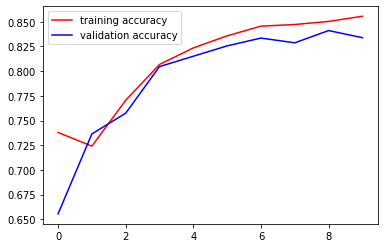

In [75]:
# check model
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

## base model result
- 학습이 덜된 모습을 보인다.
- epoch를 늘려서 테스트

### 30ephoc + base model

In [76]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [77]:
optimizer = 'adam'
loss='sparse_categorical_crossentropy'

In [78]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [80]:
epoch = 30
batch_size = 128

In [81]:
history = model.fit(x_train, Y_train, 
                    validation_data=(x_test, Y_test), 
                    epochs=epoch, batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 32us/sample - loss: 6.9405 - accuracy: 0.7100 - val_loss: 1.2479 - val_accuracy: 0.6584
Epoch 2/30
60000/60000 [==============================] - 1s 25us/sample - loss: 0.8837 - accuracy: 0.7038 - val_loss: 0.8273 - val_accuracy: 0.6981
Epoch 3/30
60000/60000 [==============================] - 2s 25us/sample - loss: 0.6956 - accuracy: 0.7371 - val_loss: 0.7085 - val_accuracy: 0.7620
Epoch 4/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5851 - accuracy: 0.7873 - val_loss: 0.6423 - val_accuracy: 0.7801
Epoch 5/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5351 - accuracy: 0.8048 - val_loss: 0.6482 - val_accuracy: 0.7761
Epoch 6/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5063 - accuracy: 0.8184 - val_loss: 0.5572 - val_accuracy: 0.8164
Epoch 7/30
60000/60000 [==============================] 

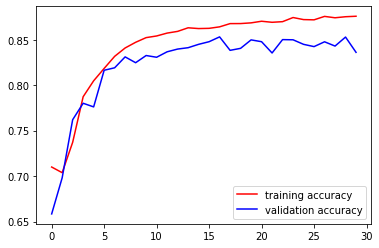

In [82]:
# check model
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

### 30 epoch + basemodel result
- 10epoch 이후에 overfitting이 발생
- test accuracy 또한 90에 도달을 못함 model 수정을 생각해보자

In [76]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [77]:
optimizer = 'adam'
loss='sparse_categorical_crossentropy'

In [78]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [80]:
epoch = 30
batch_size = 128

In [81]:
history = model.fit(x_train, Y_train, 
                    validation_data=(x_test, Y_test), 
                    epochs=epoch, batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 32us/sample - loss: 6.9405 - accuracy: 0.7100 - val_loss: 1.2479 - val_accuracy: 0.6584
Epoch 2/30
60000/60000 [==============================] - 1s 25us/sample - loss: 0.8837 - accuracy: 0.7038 - val_loss: 0.8273 - val_accuracy: 0.6981
Epoch 3/30
60000/60000 [==============================] - 2s 25us/sample - loss: 0.6956 - accuracy: 0.7371 - val_loss: 0.7085 - val_accuracy: 0.7620
Epoch 4/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5851 - accuracy: 0.7873 - val_loss: 0.6423 - val_accuracy: 0.7801
Epoch 5/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5351 - accuracy: 0.8048 - val_loss: 0.6482 - val_accuracy: 0.7761
Epoch 6/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5063 - accuracy: 0.8184 - val_loss: 0.5572 - val_accuracy: 0.8164
Epoch 7/30
60000/60000 [==============================] 

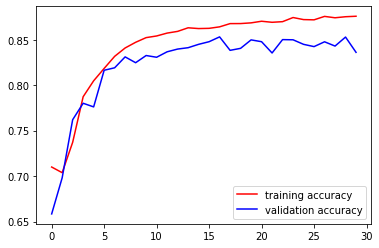

In [82]:
# check model
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()